In [1]:
"""
Purpose: To demonstrate how to access the computed features of a neuron
generated at different stages the preprocessing pipeline

If more information on how to access the different hierarchices of a neuron object (branch, limb, neuron)
please refer to the ipynb tutorial titled "Neuron_Limb_Branch_Hierarchical_Data_Structure"
"""

'\nPurpose: To demonstrate how to access the computed features of a neuron\ngenerated at different stages the preprocessing pipeline\n\nIf more information on how to access the different hierarchices of a neuron object (branch, limb, neuron)\nplease refer to the ipynb tutorial titled "Neuron_Limb_Branch_Hierarchical_Data_Structure"\n'

In [2]:
%load_ext autoreload 
%autoreload 2

In [169]:
import neurd

In [278]:
from neurd import neuron_visualizations as nviz
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [33]:
import numpy as np

# Loading a neuron object

In [4]:
from neurd import neuron_utils as nru

In [5]:
mesh_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224.off"
obj_autoproof_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224_auto_proof.pbz2"
obj_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224.pbz2"

n_obj = nru.decompress_neuron(
    filepath=obj_path,
    original_mesh=mesh_path
)

n_obj_proof = nru.decompress_neuron(
    filepath=obj_autoproof_path,
    original_mesh=mesh_path
)

Decompressing Neuron in minimal output mode...please wait
Decompressing Neuron in minimal output mode...please wait


In [9]:
mesh = n_obj.mesh

In [10]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(mesh)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Feature Background Information

In [11]:
"""
Features can be accesed using the following access points

a) neuron/limb/branch attributes:
attributes/properties of the objects

b) pipeline products: the datastructure attached to the 
neuron object as an attribute that stores computed
features or meta data from different stages of the processing pipeline

- Note: all data stored in pipeline products can be accessed
like an attribute/property of the neuron object (enabled
by overriding the __getattr__ class function

c) dynamic attributes: an external function provided by utility
modules in NEURD or a function needed to be implemented by the user
is needed to generate a certain feature (although all the raw
inputs are avaible in the neuron object)

d) neuron lite attribute: When the simplified networkx structure
of the neuron is generated, some features are computed or
easier to acces

"""

'\nFeatures can be accesed using the following access points\n\na) neuron/limb/branch attributes:\nattributes/properties of the objects\n\nb) pipeline products: the datastructure attached to the \nneuron object as an attribute that stores computed\nfeatures or meta data from different stages of the processing pipeline\n\n- Note: all data stored in pipeline products can be accessed\nlike an attribute/property of the neuron object (enabled\nby overriding the __getattr__ class function\n\nc) neuron lite attribute: When the simplified networkx structure\nof the neuron is generated, some features are computed or\neasier to acces\n\nd) dynamic attributes: an external function provided by utility\nmodules in NEURD or a function needed to be implemented by the user\nis needed to generate a certain feature (although all the raw\ninputs are avaible in the neuron object)\n\n'

## Definitions

In [12]:
"""
skeleton
--------
Nx2x3 numpy array where each row (a 2x3 array) are two 3D coordinates
that define one segment of the skeleton

neuron object lite
-----------------
a non-hierarchical simplified networkx data structure representation
of the neuron where nodes are branches (with name "L{limb_idx}_{node_idx}") or somas
with thier respective attributes and edges connect adjacent branch objects

limb_branch_dict
----------------
a dictionary object where the
keys are the limb name (Ex: L1 for the 2nd limb) and 
the values are the branch names

 {'L0': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 'L4': array([0, 1, 2, 3, 4, 5, 6]),
 'L5': array([0]),
 'L6': array([0]),
 'L2': array([0, 1, 2]),
 'L3': array([0, 1, 2, 3, 4]),
 'L7': array([0, 1, 2])}


concept_network
---------------
neuron and limb attribute that is a networkx graph that stores
the behind the scenes graph connectivity of the nodes (limbs/somas for neuron and branches for limb)

concept_network_directed
------------------------
limb attribute that is a networkx graph that stores
the behind the scenes directed graph connectivity of which 
branches are connected and direction describes direction away from the soma


"""
""""""

''

In [76]:
n_obj.concept_network

## Example of how to access pipeline products

In [13]:
data = n_obj.pipeline_products
for k in data.stages:
    print(k)

decimation
soma_identification
decomposition


In [14]:
stage_data = data['soma_identification']
print(stage_data)

    glia_meshes:[]
    nuclei_meshes:[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.shape=(727, 3))>, <trimesh.Trimesh(vertices.shape=(363, 3), faces.shape=(876, 3))>, <trimesh.Trimesh(vertices.shape=(301, 3), faces.shape=(613, 3))>, <trimesh.Trimesh(vert

In [15]:
data = n_obj_proof.pipeline_products
for k in data.stages:
    print(k)

decimation
soma_identification
decomposition
multi_soma_split_suggestions
multi_soma_split_execution
cell_type_ax_dendr
auto_proof


# 2. Soma Identification

## b) pipeline products

In [16]:
stage_products = n_obj.pipeline_products['soma_identification']
stage_products

### soma meshes

In [22]:
soma_meshes = stage_products["soma_meshes"]
# using attribute method as a faster way of accessing pipeline products 
soma_meshes = n_obj.soma_meshes

In [18]:
ipvu.plot_objects(
    mesh,
    meshes = soma_meshes,
    meshes_colors="red"
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### nuclei_meshes

In [23]:
nuclei_meshes = stage_products['nuclei_meshes']
# using attribute method as a faster way of accessing pipeline products 
nuclei_meshes = n_obj.nuclei_meshes

In [20]:
ipvu.plot_objects(
    mesh,
    meshes = nuclei_meshes,
    meshes_colors="red"
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### glia meshes

In [24]:
glia_meshes= stage_products['glia_meshes']
# using attribute method as a faster way of accessing pipeline products 
glia_meshes = n_obj.glia_meshes

# 3. Decomposition

In [268]:
nviz.visualize_neuron(
    n_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

## a) Attributes

### limbs

In [120]:
n_obj.limbs

In [126]:
# or could access by iterating through the neuron object like a list
limbs = [k for k in n_obj]
limbs

### specific limb: access like a dictionary using limb name or limb idx

In [127]:
# accessing the 5th limb
limb_obj = n_obj["L5"]
limb_obj = n_obj["L5"]

### branches

In [124]:
limb = n_obj["L1"]
limb.branches

In [128]:
# or could access by iterating through the limb object like a list
limb = n_obj["L4"]
branches = [k for k in limb]
branches

### specific branch: access like a dictionary using branch idx (not ordered in a particular order)

In [129]:
# access the 4th branch
branch = limb[4]
branch

In [414]:
print(spu.Spine.__doc__)


    Classs that will hold information about a spine extracted from a neuron

    Attributes
    ----------
    mesh_face_idx: a list of face indices of the branch that belong to the spine mesh
    mesh: the submesh of the branch that represent the spine (mesh_face_idx indexed into the branch mesh
    neck_face_idx: a list of face indices of the spine’s mesh that were classified as the neck (can be empty if not detected)
    head_face_idx:  list of face indices of the spine’s mesh that were classified as the head (can be empty if not detected)
    neck_sdf: the sdf value of the neck submesh from the clustering algorithm used to segment the head from the neck 
    head_sdf: the sdf value of the head submesh from the clustering algorithm used to segment the head from the neck 
    head_width: a width approximation using ray tracing of the head submesh
    neck_width:  a width approximation using ray tracing of the head submesh
    volume: volume of entire mesh
    spine_id: unique identi

### concept network

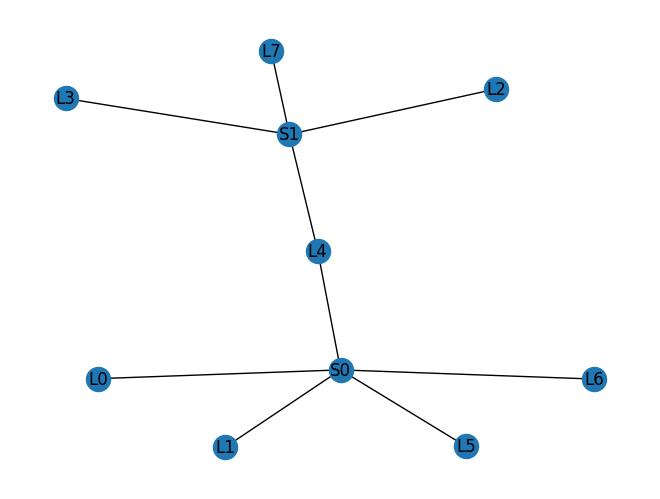

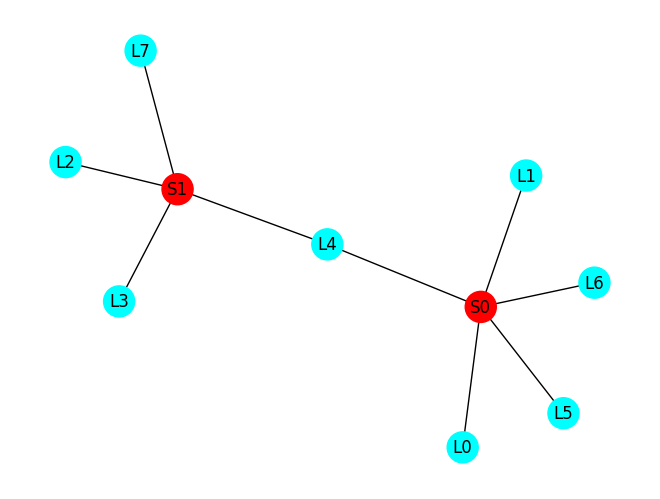

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

# neuron concept network
G = n_obj.concept_network
nx.draw(G,with_labels = True)
plt.show()

# pretties way of plotting
nviz.plot_soma_limb_concept_network(n_obj)

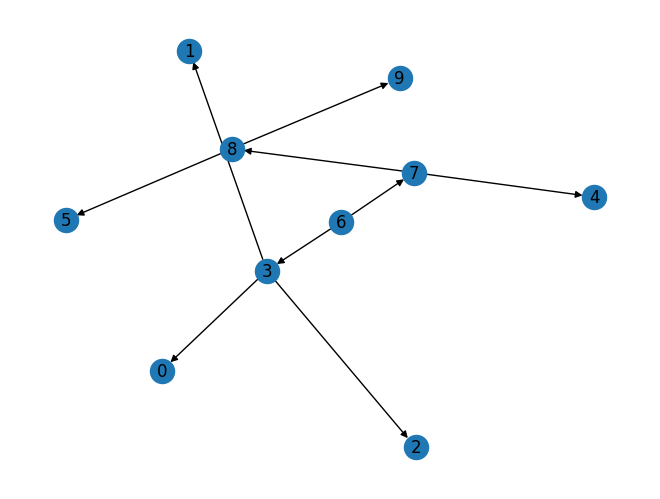

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


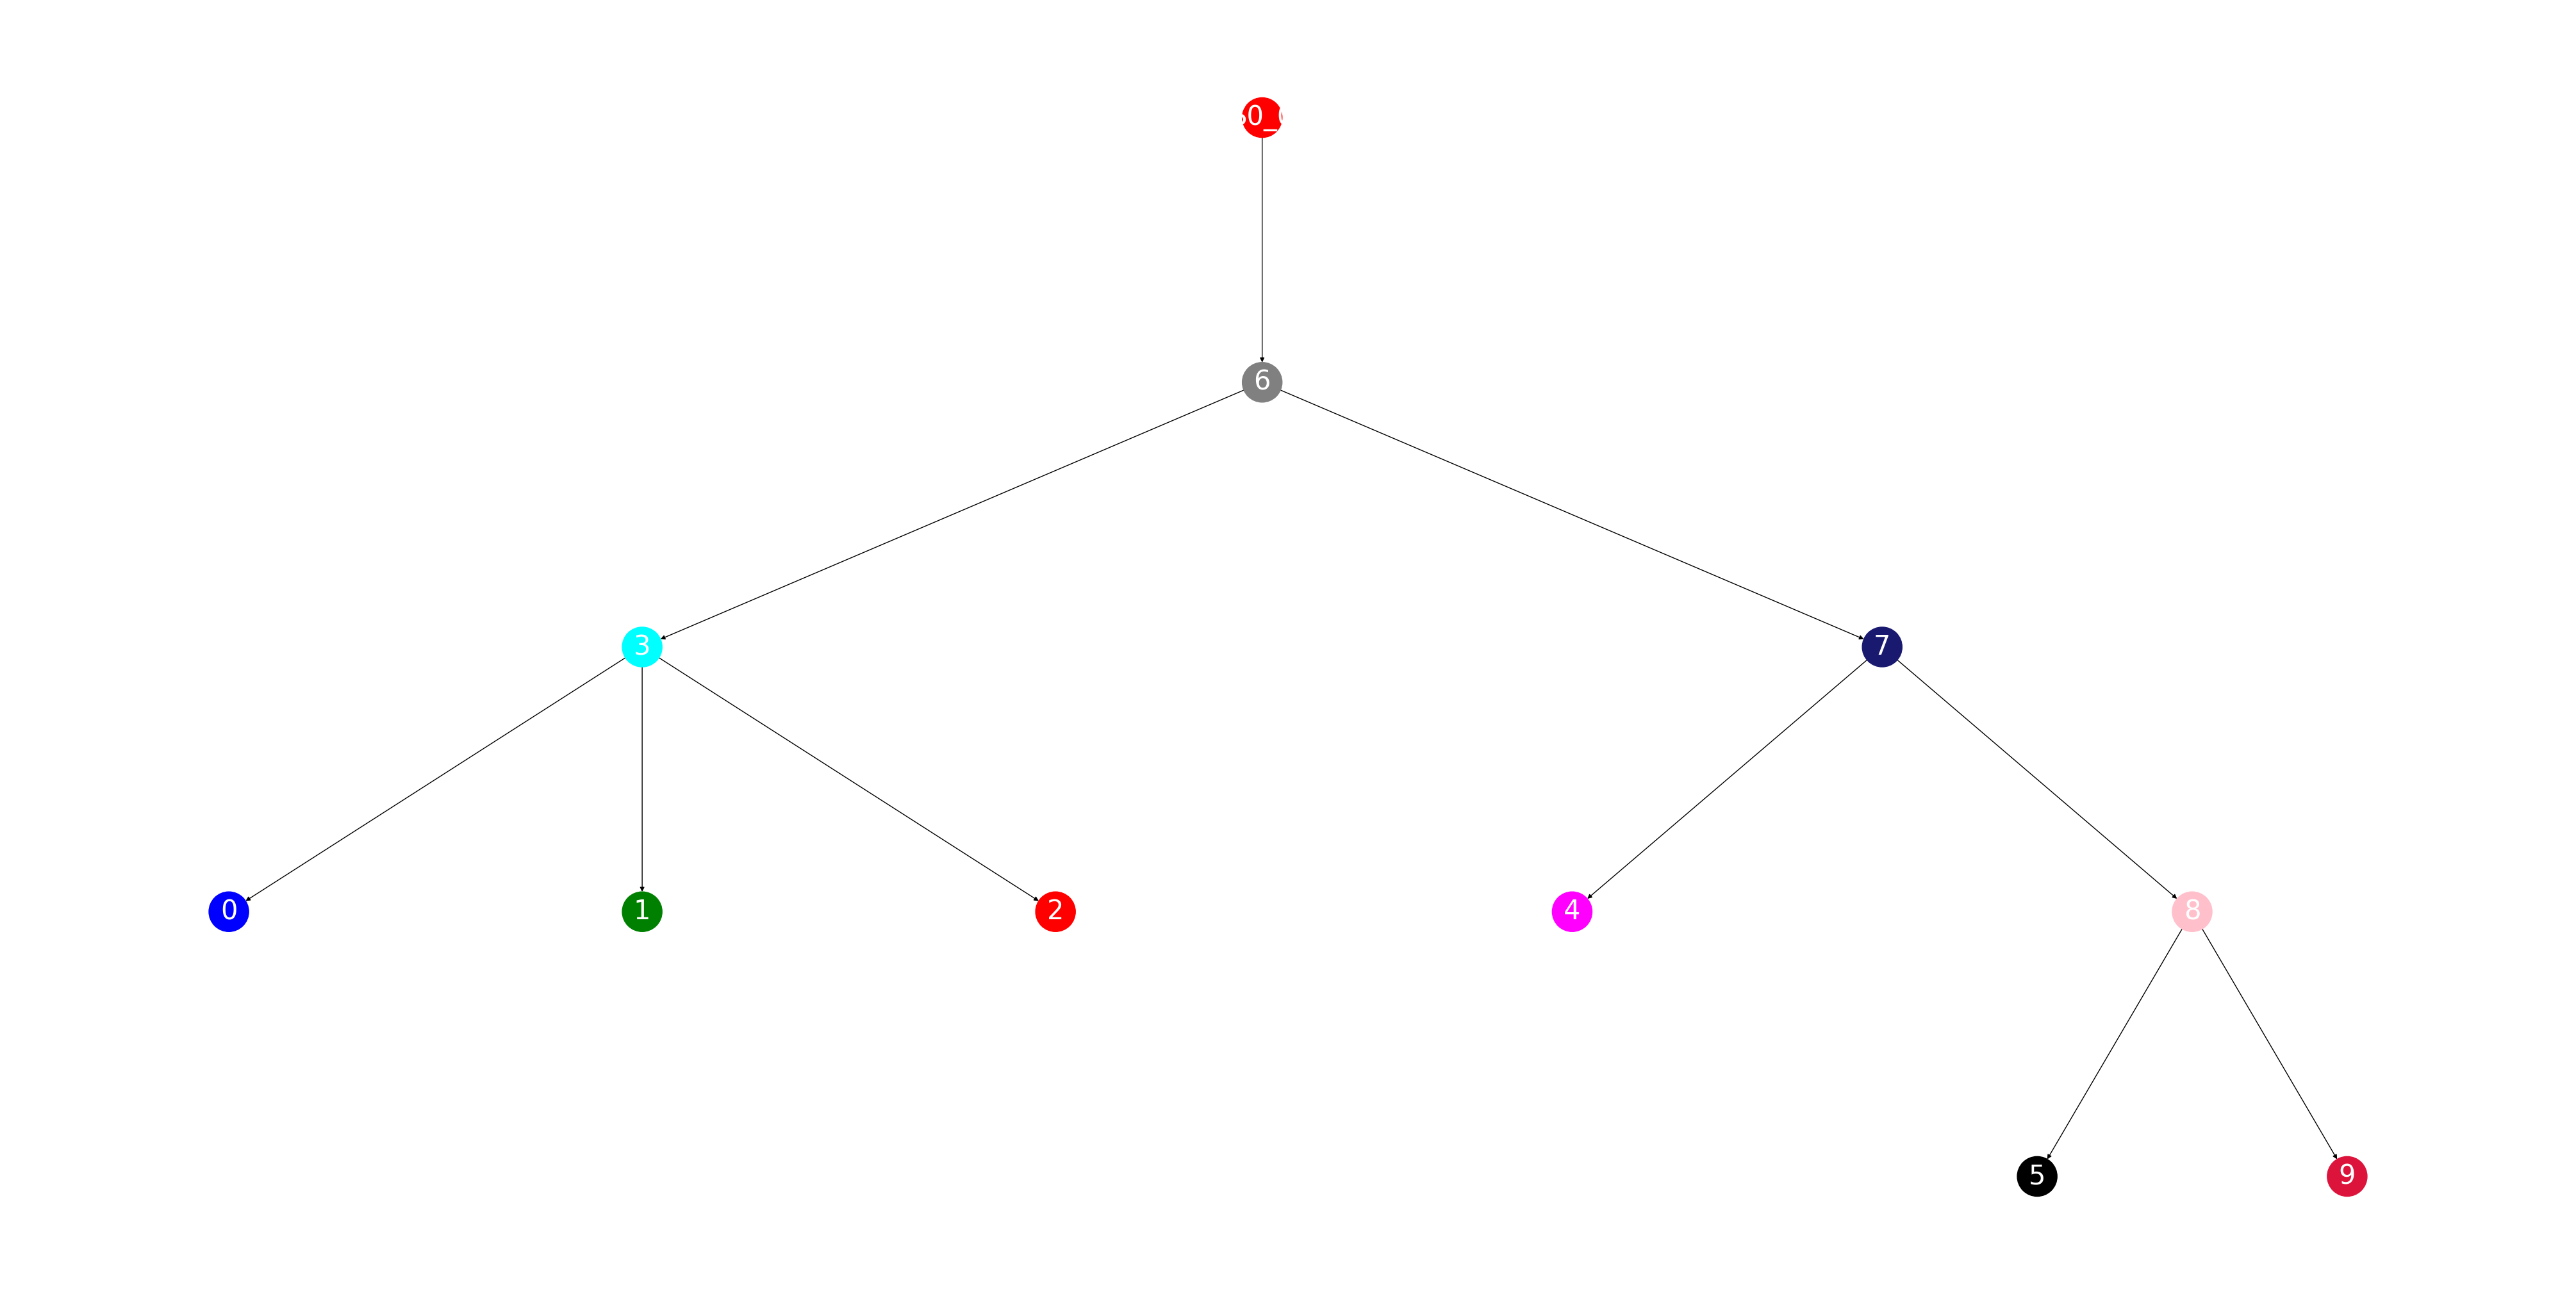

In [80]:
# neuron concept network
limb_idx = 0
limb = n_obj[limb_idx]

G = limb.concept_network_directional
nx.draw(G,with_labels = True)
plt.show()

#pretties way of plotting
nviz.plot_limb(n_obj,limb_idx)

### mesh

In [25]:
#neron_mesh
n_obj.mesh 
# limb mesh
limb_0_mesh = n_obj[0].mesh
limb_2_mesh = n_obj["L2"].mesh
#branch mesh
limb_0_branch_1_mesh = n_obj[0][1].mesh
#soma mesh
soma_1_mesh = n_obj["S0"].mesh
soma_2_mesh = n_obj["S1"].mesh

In [29]:
ipvu.plot_objects(
    mesh,
    meshes = [soma_1_mesh,soma_2_mesh,limb_2_mesh,limb_0_branch_1_mesh],
    meshes_colors = ['red','pink','aqua','orange']
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### [mean/max/sum/std]\_node\_[feature]

In [39]:
feature_name = "area"

#option 1: using list comprehension
node_features = np.array([getattr(branch,feature_name) for limb in n_obj for branch in limb])

#option 2: using explicit for loop
node_features = []
for limb in n_obj:
    for branch in limb:
        node_features.append(getattr(branch,feature_name))

print(f"mean {feature_name} = {np.mean(node_features):.2f}")
print(f"max {feature_name} = {np.max(node_features):.2f}")
print(f"std {feature_name} = {np.std(node_features):.2f}")
print(f"sum {feature_name} = {np.sum(node_features):.2f}")

mean area = 57.27
max area = 289.31
std area = 80.59
sum area = 3264.21


### [parent/children/siblings]\_feature\_[max/min]

In [41]:
from neurd import limb_utils as lu

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


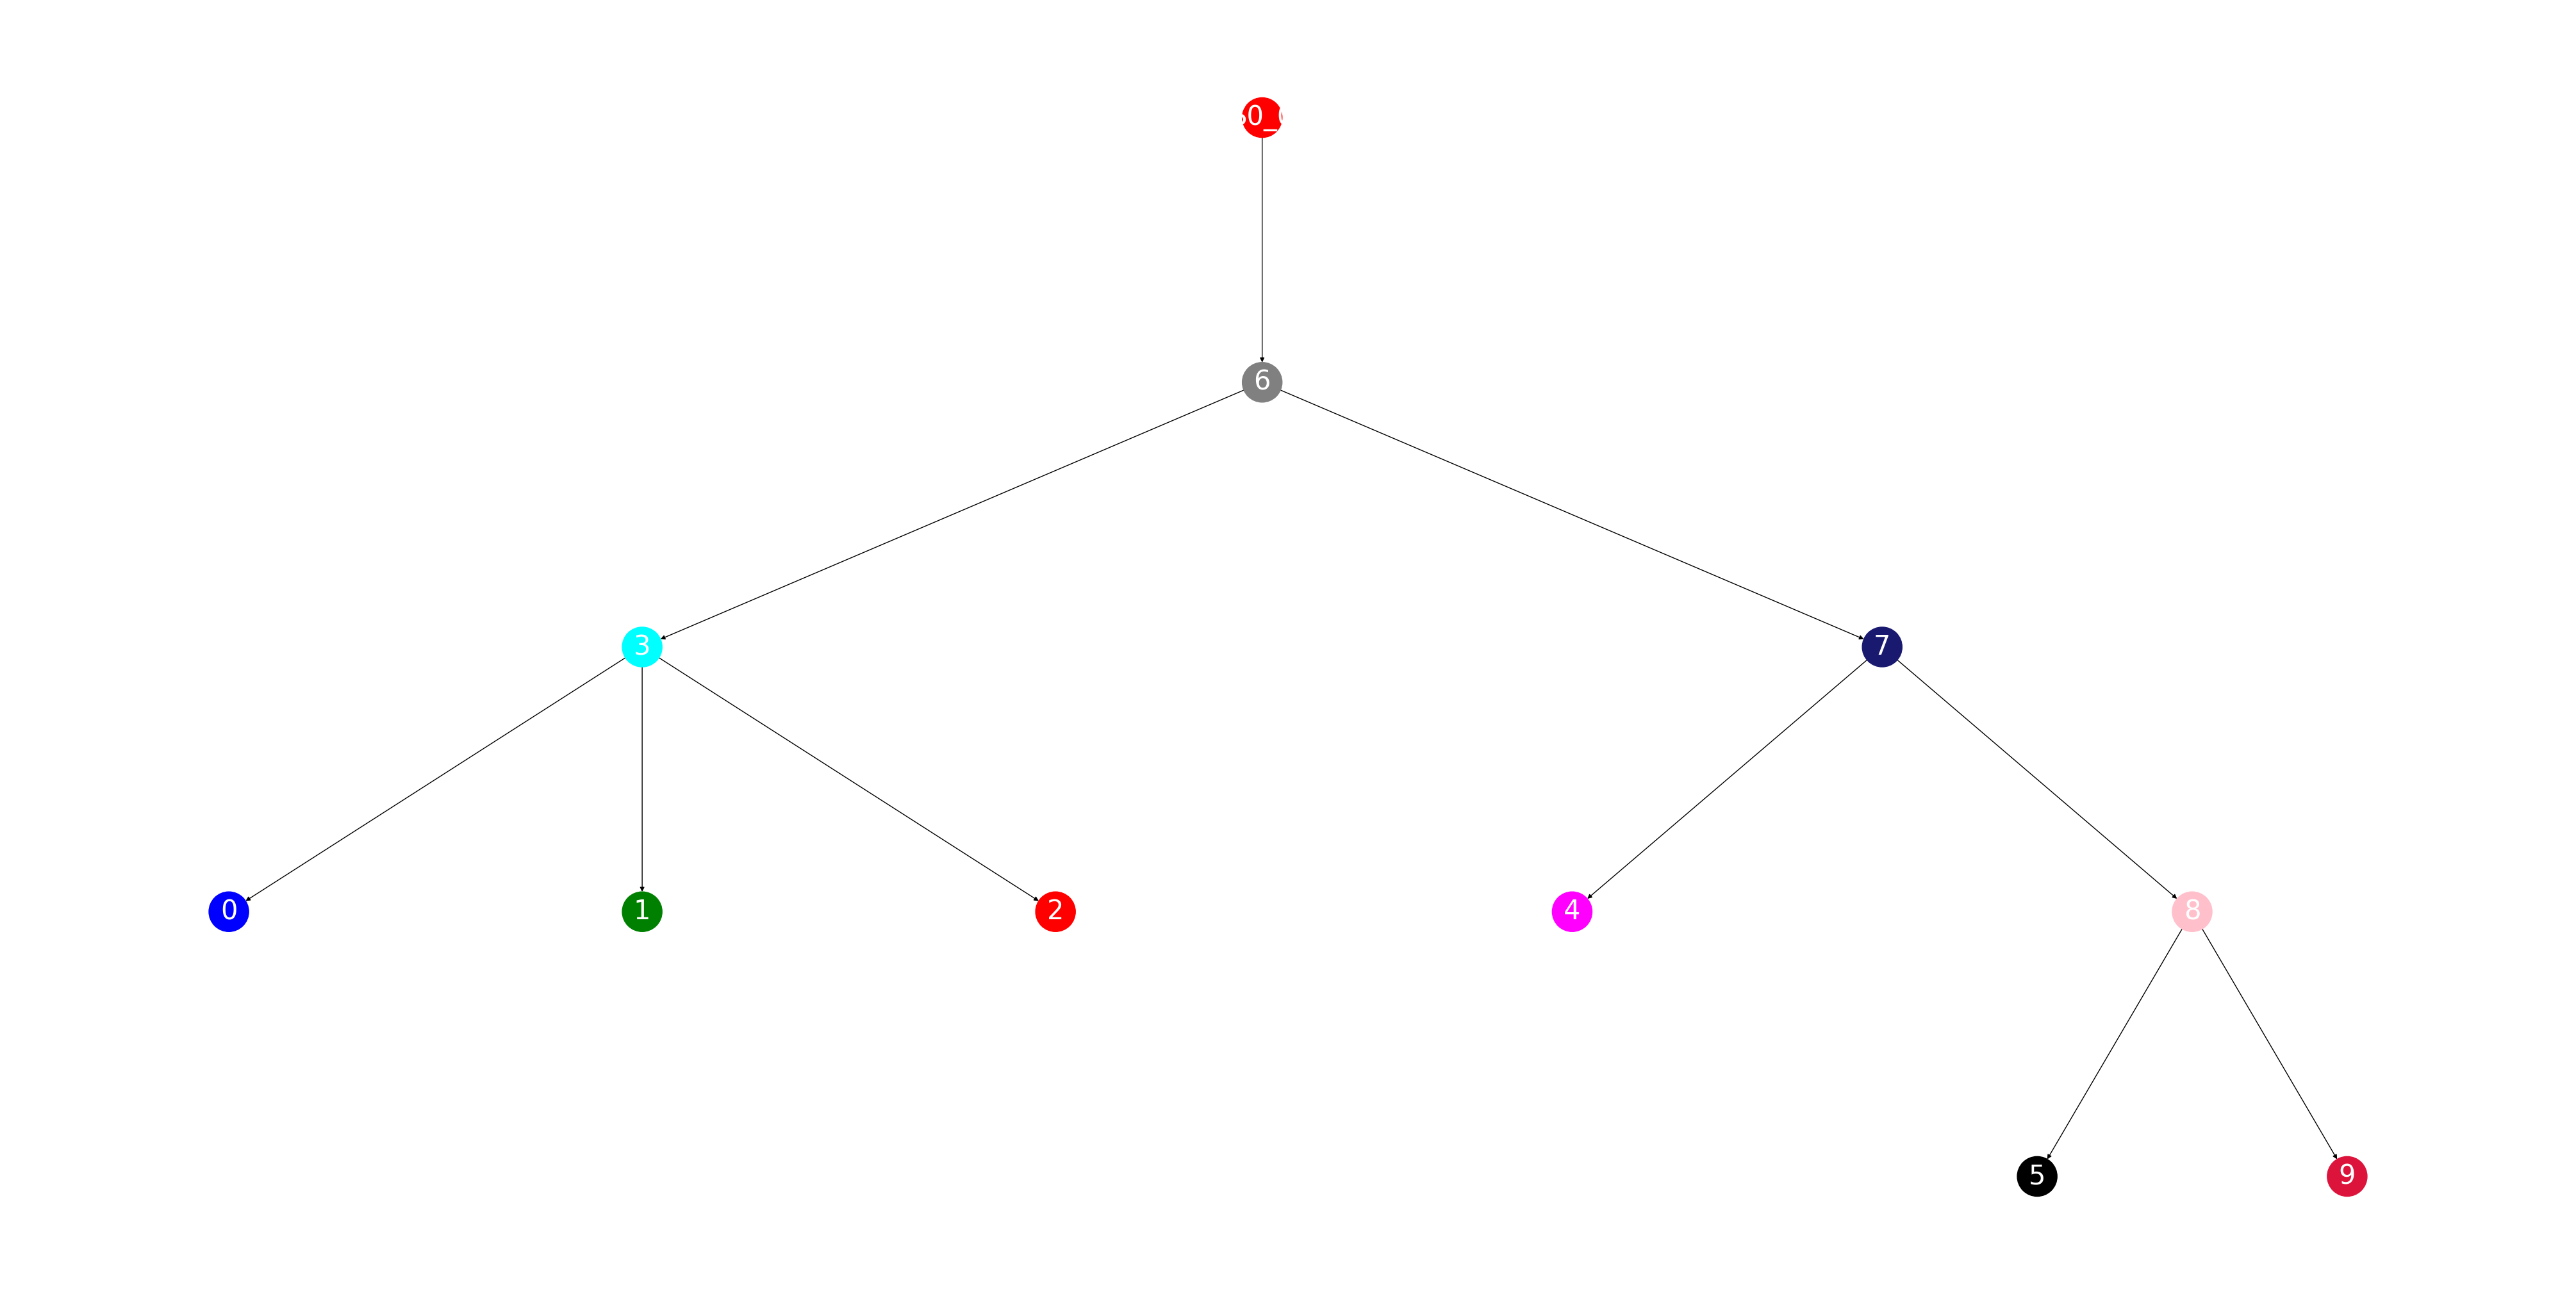

In [46]:
# picking the limb 
limb_name = "L0"

nviz.plot_limb(n_obj,limb_name)

### Ex: children\_skeletal_angle\_[max/min]

In [48]:
limb = n_obj[limb_name]
#picking the branch
branch_idx = 8
branch = limb[branch_idx]

from neurd import limb_utils as lu

min_angle = lu.children_skeletal_angle_min(limb,branch_idx,verbose = True)
print(f"min_angle = {min_angle}\n")
max_angle = lu.children_skeletal_angle_max(limb,branch_idx,verbose = True)
print(f"max_angle = {max_angle}")

### area (um**2)

In [59]:
n_obj.area # neuron area
n_obj["L0"].area # limb area
n_obj["L1"][2].area # branch area
n_obj["S0"].area # 1st soma area

341.07179255836047

### soma_area: sum of area of all somas

In [161]:
n_obj.soma_area

490.4086344341389

### best node feature match example: best width_overall match in children

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


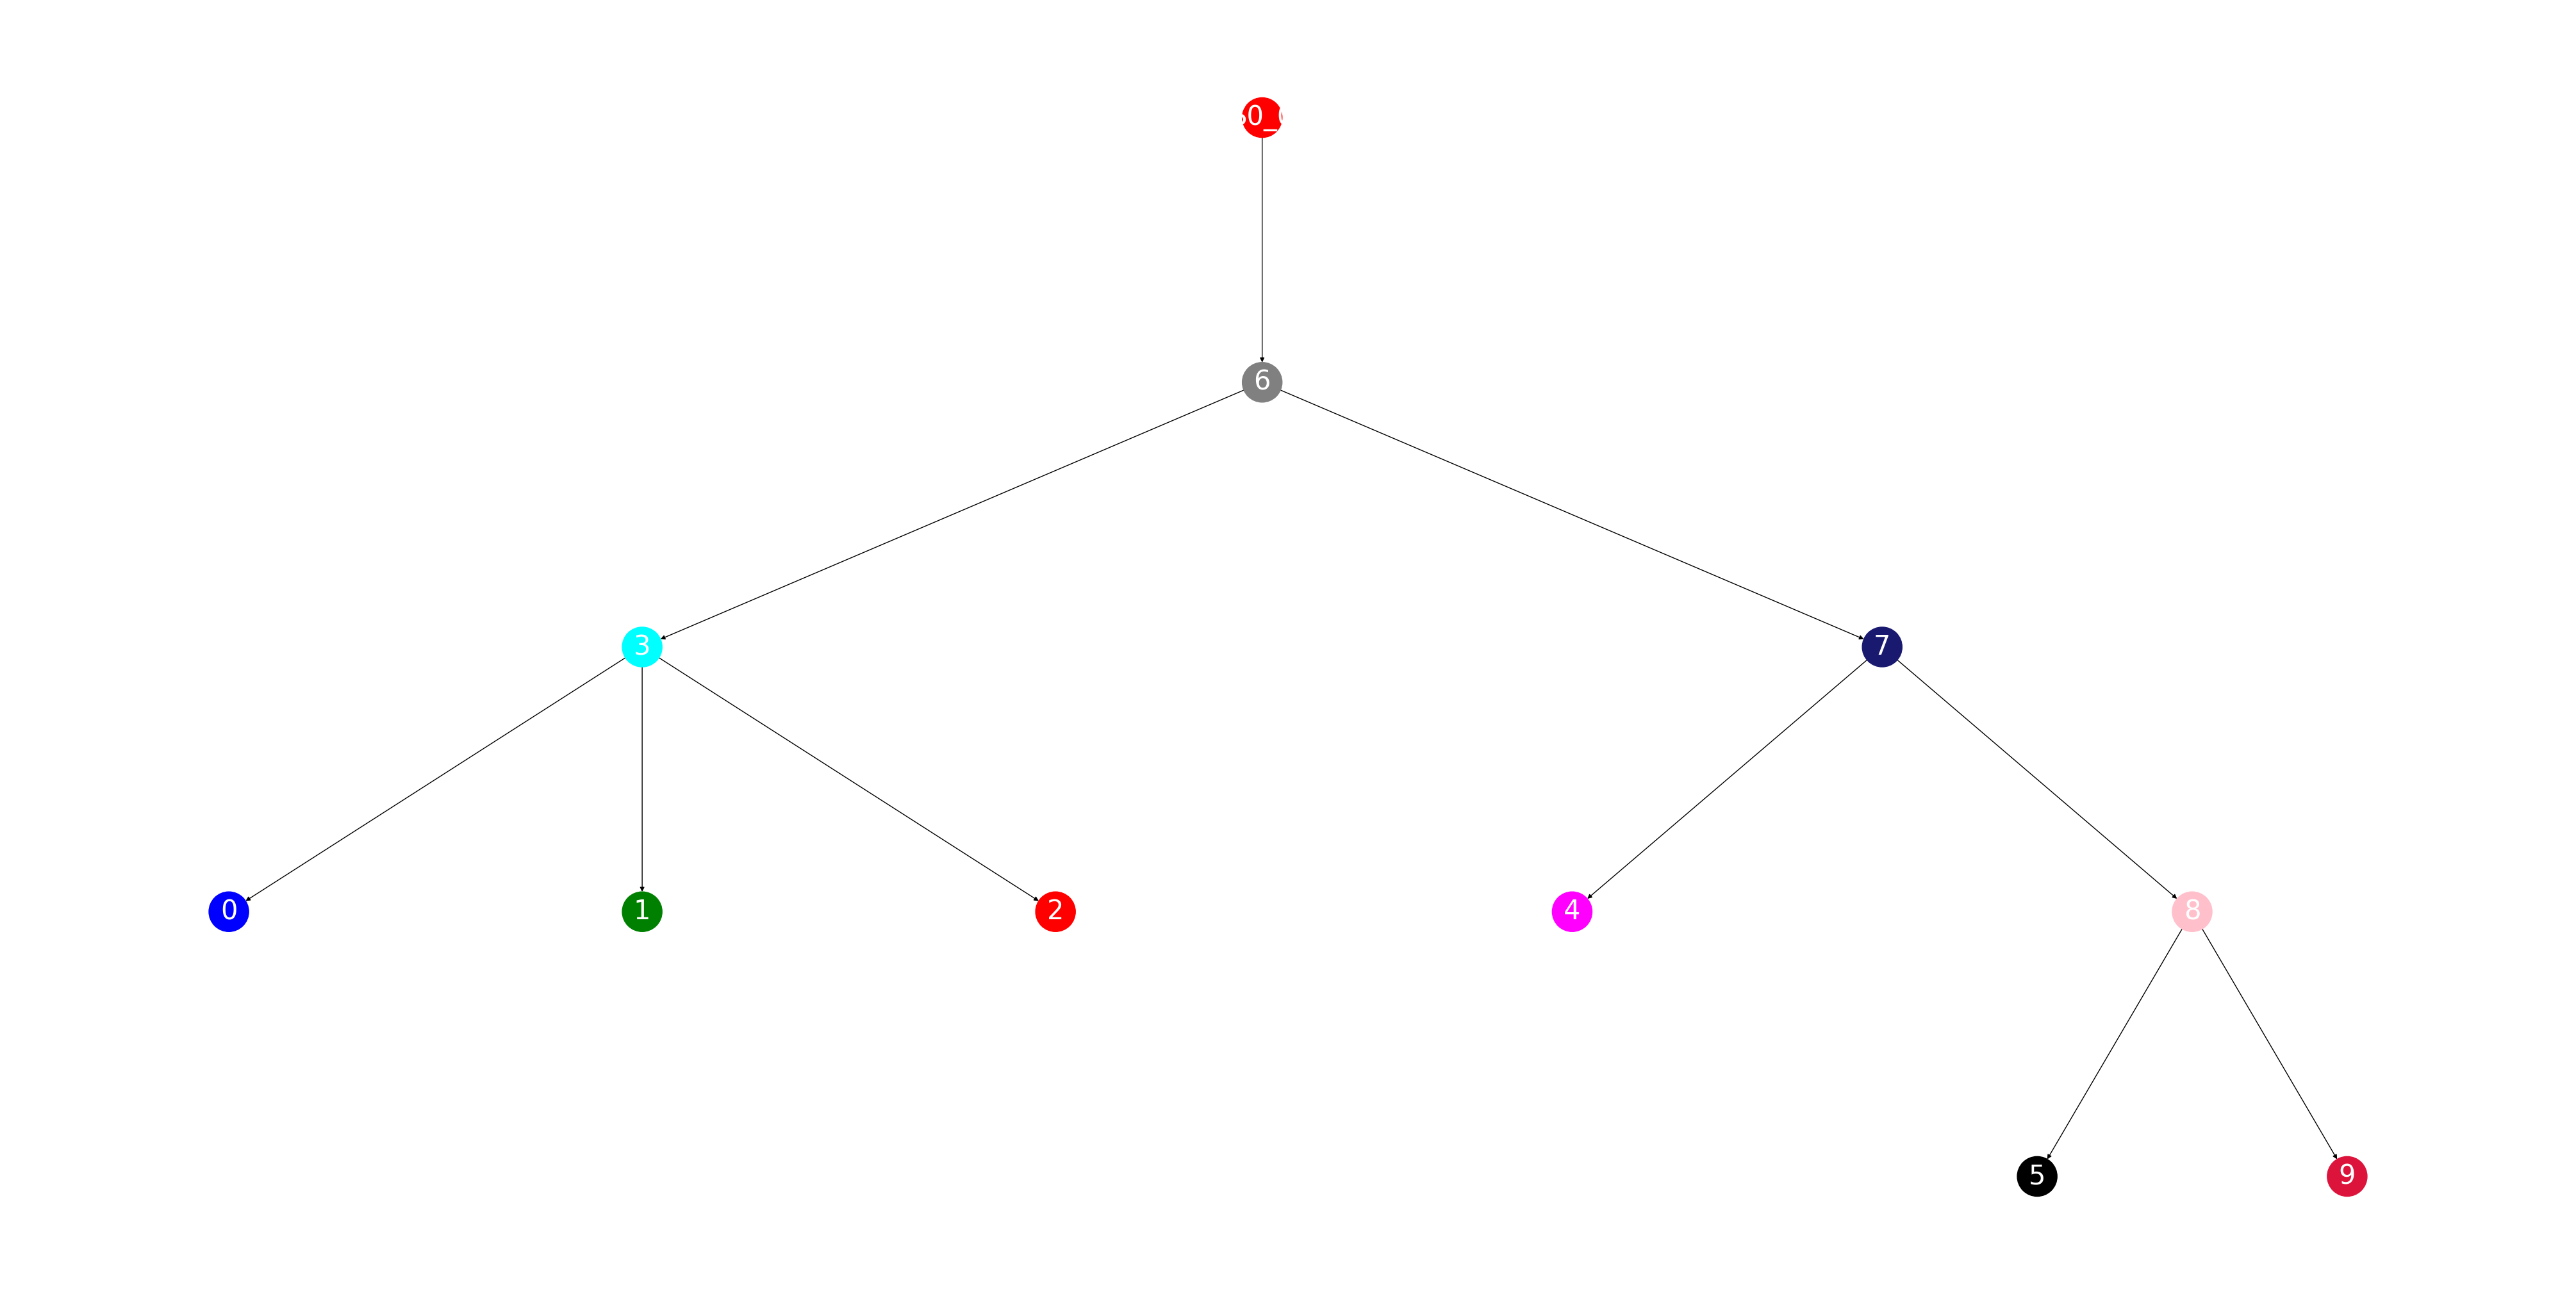

In [65]:
limb_idx = 0
limb = n_obj[limb_idx]

nviz.plot_limb(n_obj,limb_idx)

In [94]:
lu.best_feature_match_in_descendents(
    limb,
    branch_idx = 6,
    feature = "width_overall"
)


child_nodes = [3, 7, 0, 1, 2, 4, 8, 5, 9]
All children width_overall = [422.01733213972807, 345.98403683769595, 261.67118520971894, 272.5726579178621, 289.88795449575736, 301.21669775687826, 306.9702914678095, 243.4878907921956, 279.4323342661673]
Best match of Branch 6 width_overall (604.73):
   Child Node 3, width_overall = 422.02


3

### endpoint\_[downstream/upstream]

In [98]:
branch = n_obj[2][0]
branch

In [102]:
upstream = branch.endpoint_upstream
downstream = branch.endpoint_downstream

In [103]:
nviz.plot_objects(
    mesh,
    meshes = [branch.mesh],
    meshes_colors=["red"],
    scatters=[upstream,downstream],
    scatters_colors=["yellow","aqua"]
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### insignificant limbs

In [104]:
n_obj.insignificant_limbs

[<trimesh.Trimesh(vertices.shape=(11, 3), faces.shape=(15, 3))>]

### multi_soma_touching_limbs

In [130]:
n_obj.multi_soma_touching_limbs

array([4])

In [ ]:
n_obj.n_multi_soma_touching_limbs

### n_same_soma_multi_touching_limbs

In [108]:
n_obj.n_same_soma_multi_touching_limbs

0

### touching_somas`

In [204]:
n_obj[0].touching_somas(),n_obj[4].touching_somas()

([0], [0, 1])

### n_somas

In [109]:
n_obj.n_somas

2

In [110]:
# can access the soma objects like a dictionary with indexing name as S{idx}, indexing starting at 0
n_obj["S0"],n_obj["S1"]

(<neurd.neuron.Soma at 0x7f6df469baf0>, <neurd.neuron.Soma at 0x7f6df4604430>)

### n_branches

In [113]:
print(f"# of branches in neuron = {n_obj.n_branches}")
print(f"# of branches in limb 2 = {n_obj[2].n_branches}")

# of branches in neuron = 57
# of branches in limb 2 = 3


### n_branches_per_limb

In [114]:
n_obj.n_branches_per_limb

[10, 27, 3, 5, 7, 1, 1, 3]

### mesh volume attributes

In [138]:
print(f"neuron mesh volume without somas = {n_obj.mesh_volume}")
print(f"neuron mesh volume without somas = {n_obj.mesh_volume_with_somas}")
print(f"limb 2 volume = {n_obj['L2'].mesh_volume}")
print(f"limb 2 branch 0 volume = {n_obj['L2'][0].mesh_volume}")
print(f"soma 1 volume = {n_obj['S0'].mesh_volume}")

neuron mesh volume without somas = 2218.130359156722
neuron mesh volume without somas = 2658.870956826423
limb 2 volume = 60.37051537923167
limb 2 branch 0 volume = 6.338844200233377
soma 1 volume = 440.7405976697012


### skeleton

In [153]:
neuron_skeleton = n_obj.skeleton
limb_skeleton = n_obj[5].skeleton
branch_skeleton = n_obj[0][3].skeleton

ipvu.plot_objects(
    mesh,
    skeletons = [neuron_skeleton,limb_skeleton,branch_skeleton],
    skeletons_colors=["orange",'brown',"black"]
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### skeletal length

In [154]:
print(f"neuron skeletal length (nm) = {n_obj.skeletal_length:.2f}" )
print(f"limb skeletal length (nm) = {n_obj[1].skeletal_length:.2f}" )
print(f"branch skeletal length (nm) = {n_obj[1][0].skeletal_length:.2f}" )

neuron skeletal length (nm) = 1543858.60
limb skeletal length (nm) = 604558.50
branch skeletal length (nm) = 25822.85


### skeleton_bounding_box

In [160]:
from mesh_tools import skeleton_utils as sk
sk.bbox(n_obj.skeleton)
sk.bbox(n_obj[0].skeleton)

array([[1462157.54402012,  578375.79108058, 1062346.50333018],
       [1564397.98216806,  651398.35736603, 1114260.        ]])

### skeletal_angle_[start/end]

In [186]:
branch = n_obj[0][9]
nviz.plot_branch(branch,axis_box_off=False)

upstream_color = yellow
downstream_color = aqua


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [166]:
branch.skeleton_vector_downstream

array([ 0.1322245 ,  0.98255628, -0.13076634])

In [187]:
branch.skeleton_vector_upstream

array([ 0.9617491 , -0.16448511, -0.21905096])

### spines

In [198]:
n_obj.spines
n_obj[0].spines
n_obj[0][5].spines

[<trimesh.Trimesh(vertices.shape=(98, 3), faces.shape=(188, 3))>,
 <trimesh.Trimesh(vertices.shape=(82, 3), faces.shape=(158, 3))>,
 <trimesh.Trimesh(vertices.shape=(83, 3), faces.shape=(156, 3))>,
 <trimesh.Trimesh(vertices.shape=(81, 3), faces.shape=(155, 3))>,
 <trimesh.Trimesh(vertices.shape=(77, 3), faces.shape=(146, 3))>,
 <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(145, 3))>,
 <trimesh.Trimesh(vertices.shape=(72, 3), faces.shape=(139, 3))>,
 <trimesh.Trimesh(vertices.shape=(72, 3), faces.shape=(139, 3))>,
 <trimesh.Trimesh(vertices.shape=(71, 3), faces.shape=(137, 3))>,
 <trimesh.Trimesh(vertices.shape=(73, 3), faces.shape=(136, 3))>,
 <trimesh.Trimesh(vertices.shape=(67, 3), faces.shape=(124, 3))>,
 <trimesh.Trimesh(vertices.shape=(64, 3), faces.shape=(121, 3))>,
 <trimesh.Trimesh(vertices.shape=(54, 3), faces.shape=(103, 3))>,
 <trimesh.Trimesh(vertices.shape=(54, 3), faces.shape=(102, 3))>,
 <trimesh.Trimesh(vertices.shape=(50, 3), faces.shape=(95, 3))>,
 <trimesh.T

In [201]:
n_obj.n_spines
n_obj[0].n_spines
n_obj[0][5].n_spines

22

### total_spine_volume

In [209]:
from neurd import neuron_utils as nru
nru.total_spine_volume(n_obj)
nru.total_spine_volume(limb)
nru.total_spine_volume(branch)

4718458124.63335

### width features

In [214]:
branch = n_obj[0][4]

In [215]:
branch.width_overall

301.21669775687826

In [216]:
branch.width_new

{'median_mesh_center': 331.5606261403119,
 'no_spine_median_mesh_center': 301.21669775687826}

In [217]:
branch.width_array

{'median_mesh_center': array([330.02167699, 462.12189506, 686.04857801, 415.17687174,
        392.60777132, 404.6829985 , 253.81878583, 761.35077622,
        538.13560766, 961.083662  , 362.80418492, 283.07759392,
        669.67784421, 417.03009205, 328.76390346, 246.93804024,
        328.45625013, 527.04114778, 541.05062174, 683.81432281,
        877.51892166, 312.09008426, 549.92642331, 301.21669776,
        267.99233046, 711.17636008, 470.45938621, 331.56062614,
        266.07673394, 372.59349128, 213.74960606, 326.47675414,
        300.42515542, 401.67105151, 230.84896856, 217.04404461,
        560.79149569, 278.41261157, 267.98884624, 192.24848011,
        484.59724967, 474.49042122, 288.6045759 , 290.79150501,
        466.7679312 , 283.40232387, 585.02000396, 240.85725427,
        287.30326058, 285.32294802, 314.60216579, 331.56062614]),
 'no_spine_median_mesh_center': array([330.02167699, 462.12189506, 686.04857801, 415.17687174,
        312.3367213 , 404.6829985 , 253.81878583,

In [218]:
branch.width_array_upstream_to_downstream

{'median_mesh_center': array([331.56062614, 314.60216579, 285.32294802, 287.30326058,
        240.85725427, 585.02000396, 283.40232387, 466.7679312 ,
        290.79150501, 288.6045759 , 474.49042122, 484.59724967,
        192.24848011, 267.98884624, 278.41261157, 560.79149569,
        217.04404461, 230.84896856, 401.67105151, 300.42515542,
        326.47675414, 213.74960606, 372.59349128, 266.07673394,
        331.56062614, 470.45938621, 711.17636008, 267.99233046,
        301.21669776, 549.92642331, 312.09008426, 877.51892166,
        683.81432281, 541.05062174, 527.04114778, 328.45625013,
        246.93804024, 328.76390346, 417.03009205, 669.67784421,
        283.07759392, 362.80418492, 961.083662  , 538.13560766,
        761.35077622, 253.81878583, 404.6829985 , 392.60777132,
        415.17687174, 686.04857801, 462.12189506, 330.02167699]),
 'no_spine_median_mesh_center': array([301.21669776, 314.60216579, 285.32294802, 283.05649218,
        240.85725427, 212.8418261 , 283.40232387,

In [219]:
branch.width_upstream, branch.width_downstream

(300.3806038557107, 492.73071668732183)

### root_[width/skeleton_vector_from_soma]

In [148]:
lu.root_skeleton_vector_from_soma(
    neuron_obj = n_obj,
    limb_idx = 3,
    soma_name = "S0",
)

array([-0.53486725, -0.68866553,  0.48954756])

In [149]:
lu.root_width(n_obj[limb_idx])

346.11854929762455

## b) Pipeline Products (can be accessed like attributes)

In [62]:
stage = n_obj.pipeline_products["decomposition"]
print(stage)

    bbox_volume:1.982945365676812
    bbox_x_max:1564397.9821680577
    bbox_x_max_soma_relative:75517.22158488538
    bbox_x_min:1430458.6668303611
    bbox_x_min_soma_relative:-58422.0937528112
    bbox_y_max:659939.5309021459
    bbox_y_max_soma_relative:70639.43716421863
    bbox_y_min:502584.2072704911
    bbox_y_min_soma_relative:-86715.88646743615
    bbox_z_max:1114260.0
    bbox_z_max_soma_relative:13607.686544879572
    bbox_z_min:1020174.8170965186
    bbox_z_min_soma_relative:-80477.49635860184
    branch_length_mean:29.199234124365066
    branch_length_median:16.73564751819507
    centroid_volume:440.7405976697012
    centroid_x:372220
    centroid_x_nm:1488880.7605831723
    centroid_y:147325
    centroid_y_nm:589300.0937379273
    centroid_z:27516
    centroid_z_nm:1100652.3134551204
    max_limb_n_branches:27
    max_limb_skeletal_length:604558.5039643556
    max_soma_area:341.07163148783616
    median_branch_length:14983.573
    n_branches:57
    n_error_limbs:1
    n_

### bbox\_[x/y/z]\_[min/max] (\_soma_relative)

In [63]:
n_obj.bbox_x_min

1430458.6668303611

In [64]:
n_obj.bbox_x_min_soma_relative

-58422.0937528112

### branch\_length\_[mean/median]

In [95]:
n_obj.branch_length_mean

29.199234124365066

In [96]:
n_obj.branch_length_median

16.73564751819507

### overall width summary statistics

In [224]:
n_obj.width_no_spine_90_perc

486.073

In [226]:
n_obj.width_no_spine_median

186.744

# ---- Switching our neuron object ot n_obj_proof because that is one that is fully automatic proofread

In [267]:
nviz.visualize_neuron(
    n_obj_proof,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# 4. Multi-Soma Split

# a) Attributes

### n_error_limbs

In [227]:
n_obj_proof.n_error_limbs

0

In [241]:
"""
a dictionary data structure that stores for each limb
- valid points: coordinates that should belong to the existing neuronal process ( a marker of where the valid mesh is). 
- error points: coordinates that should belong to incorrect neuronal process resulting from merge errors ( a marker of where the error mesh starts)
- coordinate: locations of split points used in the elimination of soma to soma paths

The valid and error points can be used as inputs for automatic mesh splitting algorithms in other pipelines (ex: Neuroglancer)
"""

'\na dictionary data structure that stores for each limb\n- valid points: coordinates that should belong to the existing neuronal process ( a marker of where the valid mesh is)\n- error points: coordinates that should belong to incorrect neuronal process resulting from merge errors ( a marker of where the error mesh starts)\n\n'

### red_blue_split_points_by_limb

In [256]:
from neurd import soma_splitting_utils as ssu
print(ssu.limb_red_blue_dict_from_red_blue_splits.__doc__)


    a dictionary data structure that stores for each limb
    - valid points: coordinates that should belong to the existing neuronal process ( a marker of where the valid mesh is). 
    - error points: coordinates that should belong to incorrect neuronal process resulting from merge errors ( a marker of where the error mesh starts)
    - coordinate: locations of split points used in the elimination of soma to soma paths

    The valid and error points can be used as inputs for automatic mesh splitting algorithms in other pipelines (ex: Neuroglancer)
    


In [257]:
n_obj_proof.red_blue_split_points_by_limb

{4: {'valid_points': array([[1491700.66666667,  587848.86666667, 1110594.33333333],
         [1489989.33333333,  587939.06666667, 1113021.66666667]]),
  'error_points': array([[1493550.        ,  586432.9       , 1108461.        ],
         [1492642.        ,  586538.9       , 1107802.66666667],
         [1493489.        ,  586627.03333333, 1106470.33333333],
         [1494101.66666667,  586228.96666667, 1111083.        ],
         [1493297.33333333,  585849.46666667, 1112854.        ],
         [1491751.66666667,  585647.        , 1114004.66666667],
         [1495465.33333333,  587016.3       , 1109645.66666667],
         [1496905.        ,  586996.53333333, 1109881.33333333],
         [1498308.66666667,  586904.83333333, 1110349.        ]]),
  'coordinate': array([[1494190. ,  586817.5, 1109335. ]])}}

# b) Pipeline Products

In [231]:
n_obj_proof.pipeline_products.stages

['decimation',
 'soma_identification',
 'decomposition',
 'multi_soma_split_suggestions',
 'multi_soma_split_execution',
 'cell_type_ax_dendr',
 'auto_proof']

In [236]:
split_suggestion_stage = n_obj_proof.pipeline_products["multi_soma_split_suggestions"]
print(f"multi_soma_split_suggestions = {split_suggestion_stage.keys()}")
split_suggestion_stage = n_obj_proof.pipeline_products["multi_soma_split_execution"]
print(f"multi_soma_split_execution = {split_suggestion_stage.keys()}")

multi_soma_split_suggestions = dict_keys(['multi_soma_split_parameters', 'n_paths_cut', 'red_blue_split_results', 'split_results'])
multi_soma_split_execution = dict_keys(['multi_soma_errored_limbs_area', 'multi_soma_errored_limbs_skeletal_length', 'multi_soma_n_multi_soma_errors', 'multi_soma_n_same_soma_errors', 'multiplicity', 'split_index'])


### n_paths_cut

In [238]:
# getting n_paths cut from pipeline products
n_paths_cut = n_obj_proof.pipeline_products["multi_soma_split_suggestions"]["n_paths_cut"]

# using short cut
n_paths_cut = n_obj_proof.n_paths_cut

n_paths_cut

1

# 5. Cell Typing

## a) Attributes

### axon_starting_coordinate

In [258]:
n_obj_proof.axon_starting_coordinate

array([1484351. ,  588129.9, 1095200. ])

### spines_obj

In [190]:
"""
A list list of spine objects where each object stores information about the spine
"""
from neurd import spine_utils as spu
print(spu.Spine.__doc__)


    Classs that will hold information about a spine extracted from a neuron

    Attributes
    ----------
    mesh_face_idx: a list of face indices of the branch that belong to the spine mesh
    mesh: the submesh of the branch that represent the spine (mesh_face_idx indexed into the branch mesh
    neck_face_idx: a list of face indices of the spine’s mesh that were classified as the neck (can be empty if not detected)
    head_face_idx:  list of face indices of the spine’s mesh that were classified as the head (can be empty if not detected)
    neck_sdf: the sdf value of the neck submesh from the clustering algorithm used to segment the head from the neck 
    head_sdf: the sdf value of the head submesh from the clustering algorithm used to segment the head from the neck 
    head_width: a width approximation using ray tracing of the head submesh
    neck_width:  a width approximation using ray tracing of the head submesh
    volume: volume of entire mesh
    spine_id: unique identi

In [262]:
# neuron spines
n_obj_proof.spines_obj
# limb spines
n_obj_proof[0].spines_obj
# branch spines
n_obj_proof[0][5].spines_obj

In [282]:
limb_idx = 0
branch_idx = 0
spine_idx = 1

branch = n_obj_proof[limb_idx][branch_idx]

spine = branch.spines_obj[spine_idx]
spine.export()

{'mesh_face_idx': array([2431, 2432, 2433, 2446, 2447, 2609, 2652, 2654, 2656, 2657, 2658,
        2659, 2660, 2661, 2760, 2761, 2762, 2763, 2764, 2765, 2775, 2776,
        3421, 3422, 3554, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563,
        3564, 3565, 3566, 3568, 3569, 3570, 3574, 3575, 3576, 3577, 3578,
        3579, 3580, 3581, 3582, 3584, 3585, 3586, 3587, 3588, 3589, 3590,
        3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3601, 3602, 3603,
        3604, 3605, 3606, 3607, 3621, 3689, 3690, 3691, 3692, 3693, 3694,
        3695, 3696, 3697, 3698, 3699, 3700, 3701, 3702, 3703, 3704, 3705,
        3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3717,
        3718, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732,
        3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743,
        3744, 3745, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755,
        3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766,
        3767, 3775, 3

### spine_obj attributes demo

In [279]:
nviz.plot_branches_with_spines(branch)


width = {'median_mesh_center': 308.20840659465966, 'no_spine_median_mesh_center': 261.67118520971894}, 
n_spines = 17,
 spine_density = 0.0003922225660708775
 spine_volume_density = 39452.16831692143
skeleton_length (in microns) = 43.34273820677613
area = 115.90574821986472
n_synapses = 31, 85% width = 476.2646190294194
n_faces = 8044


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [283]:
#mesh_face_idx: a list of face indices of the branch that belong to the spine mesh
spine_mesh_reconstructed = branch.mesh.submesh([spine.mesh_face_idx],append=True)

ipvu.plot_objects(
    branch.mesh,
    meshes = [spine_mesh_reconstructed],
    meshes_colors="red"
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [287]:
spine_mesh_head = spine.mesh.submesh([spine.head_face_idx],append=True)
spine_mesh_neck = spine.mesh.submesh([spine.neck_face_idx],append=True)

ipvu.plot_objects(
    branch.mesh,
    meshes = [spine_mesh_head,spine_mesh_neck],
    meshes_colors = ['red','aqua'],
    scatters=[spine.coordinate],
    main_skeleton = spine.skeleton,
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### spine_volume_density

In [305]:
from neurd import spine_utils as spu

print(f"Spine densithy for whole neuron = {spu.spine_volume_density(n_obj_proof)}")
print(f"Spine densithy for limb 0 = {spu.spine_volume_density(n_obj_proof[0])}")
print(f"Spine densithy for limb 0 branch 2 = {spu.spine_volume_density(n_obj_proof[2])}")

Spine densithy for whole neuron = 35118627.66460488
Spine densithy for limb 0 = 40747046.77506936
Spine densithy for limb 0 branch 2 = 27574779.893210016


### spine_density

In [304]:
from neurd import spine_utils as spu

print(f"Spine densithy for whole neuron = {spu.spine_density(n_obj_proof)}")
print(f"Spine densithy for limb 0 = {spu.spine_density(n_obj_proof[0])}")
print(f"Spine densithy for limb 0 branch 2 = {spu.spine_density(n_obj_proof[2])}")

Spine densithy for whole neuron = 0.4414069917061786
Spine densithy for limb 0 = 0.5117071909215573
Spine densithy for limb 0 branch 2 = 0.3910837351147483


### head_neck_shaft_idx

In [306]:
branch.head_neck_shaft_idx

array([2., 2., 2., ..., 3., 3., 3.])

### synapses

In [308]:
n_obj_proof.synapses
n_obj_proof[0].synapses
n_obj_proof[0][6].synapses

### synapses df (concisely shows all synapse information for cell)

In [309]:
from neurd import synapse_utils as syu
neuron_synapse_df = syu.synapses_df(n_obj_proof)

,label,limb_idx,branch_idx,compartment,syn_type,syn_id,volume,endpoints_dist,upstream_dist,downstream_dist,coordinate,closest_sk_coordinate,closest_face_idx,closest_branch_face_idx,closest_face_dist,closest_face_coordinate,soma_distance,soma_distance_euclidean,head_neck_shaft,limb_branch
0,soma,-1,NaN,soma,postsyn,478881248,202240,"[0.0, 0.0]",0.0,0.0,"[1487008, 587528, 1096120]","[1486992.3333333333, 587452.3666666667, 109616...",158201.0,NaN,87.919540,"[1486992.3333333333, 587452.3666666667, 109616...",-2.0,None,-1.0,L-1_-1
1,soma,-1,NaN,soma,postsyn,482547007,320000,"[0.0, 0.0]",0.0,0.0,"[1488952, 591388, 1104720]","[1488993.0, 591347.4666666667, 1104759.0]",167152.0,NaN,69.605683,"[1488993.0, 591347.4666666667, 1104759.0]",-2.0,None,-1.0,L-1_-1
2,soma,-1,NaN,soma,postsyn,482546961,2424320,"[0.0, 0.0]",0.0,0.0,"[1488744, 593992, 1102280]","[1488763.6666666667, 593939.5, 1102242.6666666...",173232.0,NaN,67.355813,"[1488763.6666666667, 593939.5, 1102242.6666666...",-2.0,None,-1.0,L-1_-1
3,soma,-1,NaN,soma,postsyn,482547009,2839040,"[0.0, 0.0]",0.0,0.0,"[1489052, 592864, 1103760]","[1489050.6666666667, 592910.0, 1103734.6666666...",175932.0,NaN,52.531472,"[1489050.6666666667, 592910.0, 1103734.6666666...",-2.0,None,-1.0,L-1_-1
4,soma,-1,NaN,soma,postsyn,482547105,975360,"[0.0, 0.0]",0.0,0.0,"[1489712, 592160, 1104280]","[1489769.6666666667, 592196.5333333333, 110422...",175506.0,NaN,86.834555,"[1489769.6666666667, 592196.5333333333, 110422...",-2.0,None,-1.0,L-1_-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,mesh_errored,-1,NaN,error,postsyn,482468881,3911680,None,NaN,NaN,"[1489376, 594488, 1092360]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1
961,mesh_errored,-1,NaN,error,postsyn,483712349,11443200,None,NaN,NaN,"[1501720, 609480, 1075880]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1
962,mesh_errored,-1,NaN,error,postsyn,492052366,5555200,None,NaN,NaN,"[1524840, 622592, 1056880]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1
963,mesh_errored,-1,NaN,error,postsyn,486032429,1436160,None,NaN,NaN,"[1492720, 571480, 1029520]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1


In [ ]:
"""
Note: You could then restrict this dataframe with whatever custom query you want

"""

In [315]:
branch = n_obj_proof[0][6]
branch_synapse_df = syu.synapses_df(branch)
branch_synapse_df

,syn_type,syn_id,volume,endpoints_dist,upstream_dist,downstream_dist,coordinate,closest_sk_coordinate,closest_face_idx,closest_branch_face_idx,closest_face_dist,closest_face_coordinate,soma_distance,soma_distance_euclidean,head_neck_shaft,compartment,limb_idx,branch_idx,label
0,postsyn,478881379,3072000,"[1387.1604541082309, 1050.2469553427138]",1050.246955,1387.160454,"[1487992, 598204, 1101360]","[1487710.0, 598355.0, 1101010.0]",44394,113,57.360701,"[1487970.0, 598186.5, 1101410.0]",1050.246955,None,2.0,basal,0,6,no_label


### synapses_[head/neck/no_head/shaft/spine]

In [319]:
import synapse_utils as syu
# number of synapses onto a spine head for the whole neuron 
syu.n_synapses_head(n_obj_proof)

205

In [320]:
# number of synapses onto a spine head for the 1st limb
syu.n_synapses_head(n_obj_proof[0])

124

In [321]:
syu.n_synapses_shaft(n_obj_proof)

230

### plotting the synapses

In [354]:
syu.plot_synapses(n_obj_proof)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### [axon/dendrite]_[mesh/skeleton/limb_branch_dict]

In [322]:
n_obj_proof.axon_mesh

<trimesh.Trimesh(vertices.shape=(3469, 3), faces.shape=(6764, 3))>

In [323]:
n_obj_proof.axon_limb_branch_dict

{'L1': array([0, 1, 2, 3, 4, 5, 6])}

In [340]:
# NOTE: this picture is after automatic proofreading has already been applied
ipvu.plot_objects(
    n_obj_proof["S0"].mesh,
    meshes = [n_obj_proof.axon_mesh,n_obj_proof.dendrite_mesh],
    meshes_colors=["orange","purple"],
    skeletons = [n_obj_proof.axon_skeleton,n_obj_proof.dendrite_skeleton],
    skeletons_colors=["red","aqua"],
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [326]:
nviz.plot_axon(n_obj_proof)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### [axon/dendrite]_skeleton

In [ ]:
n_obj_proof.axon_skeleton

### bouton_meshes

In [351]:
nviz.plot_boutons(n_obj_proof)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### synapses_[pre/post]

In [358]:
n_obj_proof.synapses_pre
n_obj_proof[0][0].synapses_post

### n_synapses_[somas/error]

In [ ]:
n_obj_proof.n_synapses_somas

In [364]:
n_obj_proof.n_synapses_error

408

## b) Pipeline Products [THESE RESULTS WILL ALL BE BEFORE AUTOMATIC PROOFREADING WAS APPLIED, and the neuron object currently being used is from after the automatic proofreading stage, which is why some numbers might differ)

In [291]:
n_obj_proof.stages

['decimation',
 'soma_identification',
 'decomposition',
 'multi_soma_split_suggestions',
 'multi_soma_split_execution',
 'cell_type_ax_dendr',
 'auto_proof']

In [372]:
stage_products = n_obj_proof.pipeline_products["cell_type_ax_dendr"]
print(stage_products)

    axon_angle_max:144.06
    axon_angle_min:144.06
    axon_area:554.6607853653894
    axon_bbox_volume:0.837546263833745
    axon_bbox_x_max:1525626.0
    axon_bbox_x_max_soma_relative:36745.23941682768
    axon_bbox_x_min:1430163.0
    axon_bbox_x_min_soma_relative:-58717.76058317232
    axon_bbox_y_max:660063.0
    axon_bbox_y_max_soma_relative:70762.90626207273
    axon_bbox_y_min:559332.6
    axon_bbox_y_min_soma_relative:-29967.49373792729
    axon_bbox_z_max:1114281.0
    axon_bbox_z_max_soma_relative:13628.686544879572
    axon_bbox_z_min:1027182.0
    axon_bbox_z_min_soma_relative:-73470.31345512043
    axon_branch_length_mean:10.453985490894182
    axon_branch_length_median:5.066221657520934
    axon_length:784.0489118170636
    axon_n_branches:75
    axon_n_limbs:5
    axon_n_long_branches:1
    axon_n_medium_branches:31
    axon_n_short_branches:43
    axon_skeletal_length:784048.9118170637
    axon_skeleton:[[[1430163.          633318.         1114281.        ]
  [1430219

### [axon/dendrite]\_angle_[max/min]

In [349]:
n_obj_proof.n_boutons

0

In [328]:
stage_products.axon_angle_max

#using the shortcut
n_obj_proof.axon_angle_max

144.06

### [axon/dendrite]\_bbox_[x/y/z]_[min/max] (_soma_relative)

In [333]:
stage_products.axon_bbox_x_min
stage_products.axon_bbox_x_max_soma_relative

36745.23941682768

In [341]:
stage_products.dendrite_bbox_x_max_soma_relative

75517.22158488538

### baylor_cell_type

In [342]:
stage_products.baylor_cell_type

'excitatory'

In [343]:
stage_products.baylor_cell_type_exc_probability

0.9020010805386973

### neuron objects lite

In [366]:
stage_products.neuron_graph_axon_labeled

In [367]:
stage_products.neuron_graph_high_fid_axon

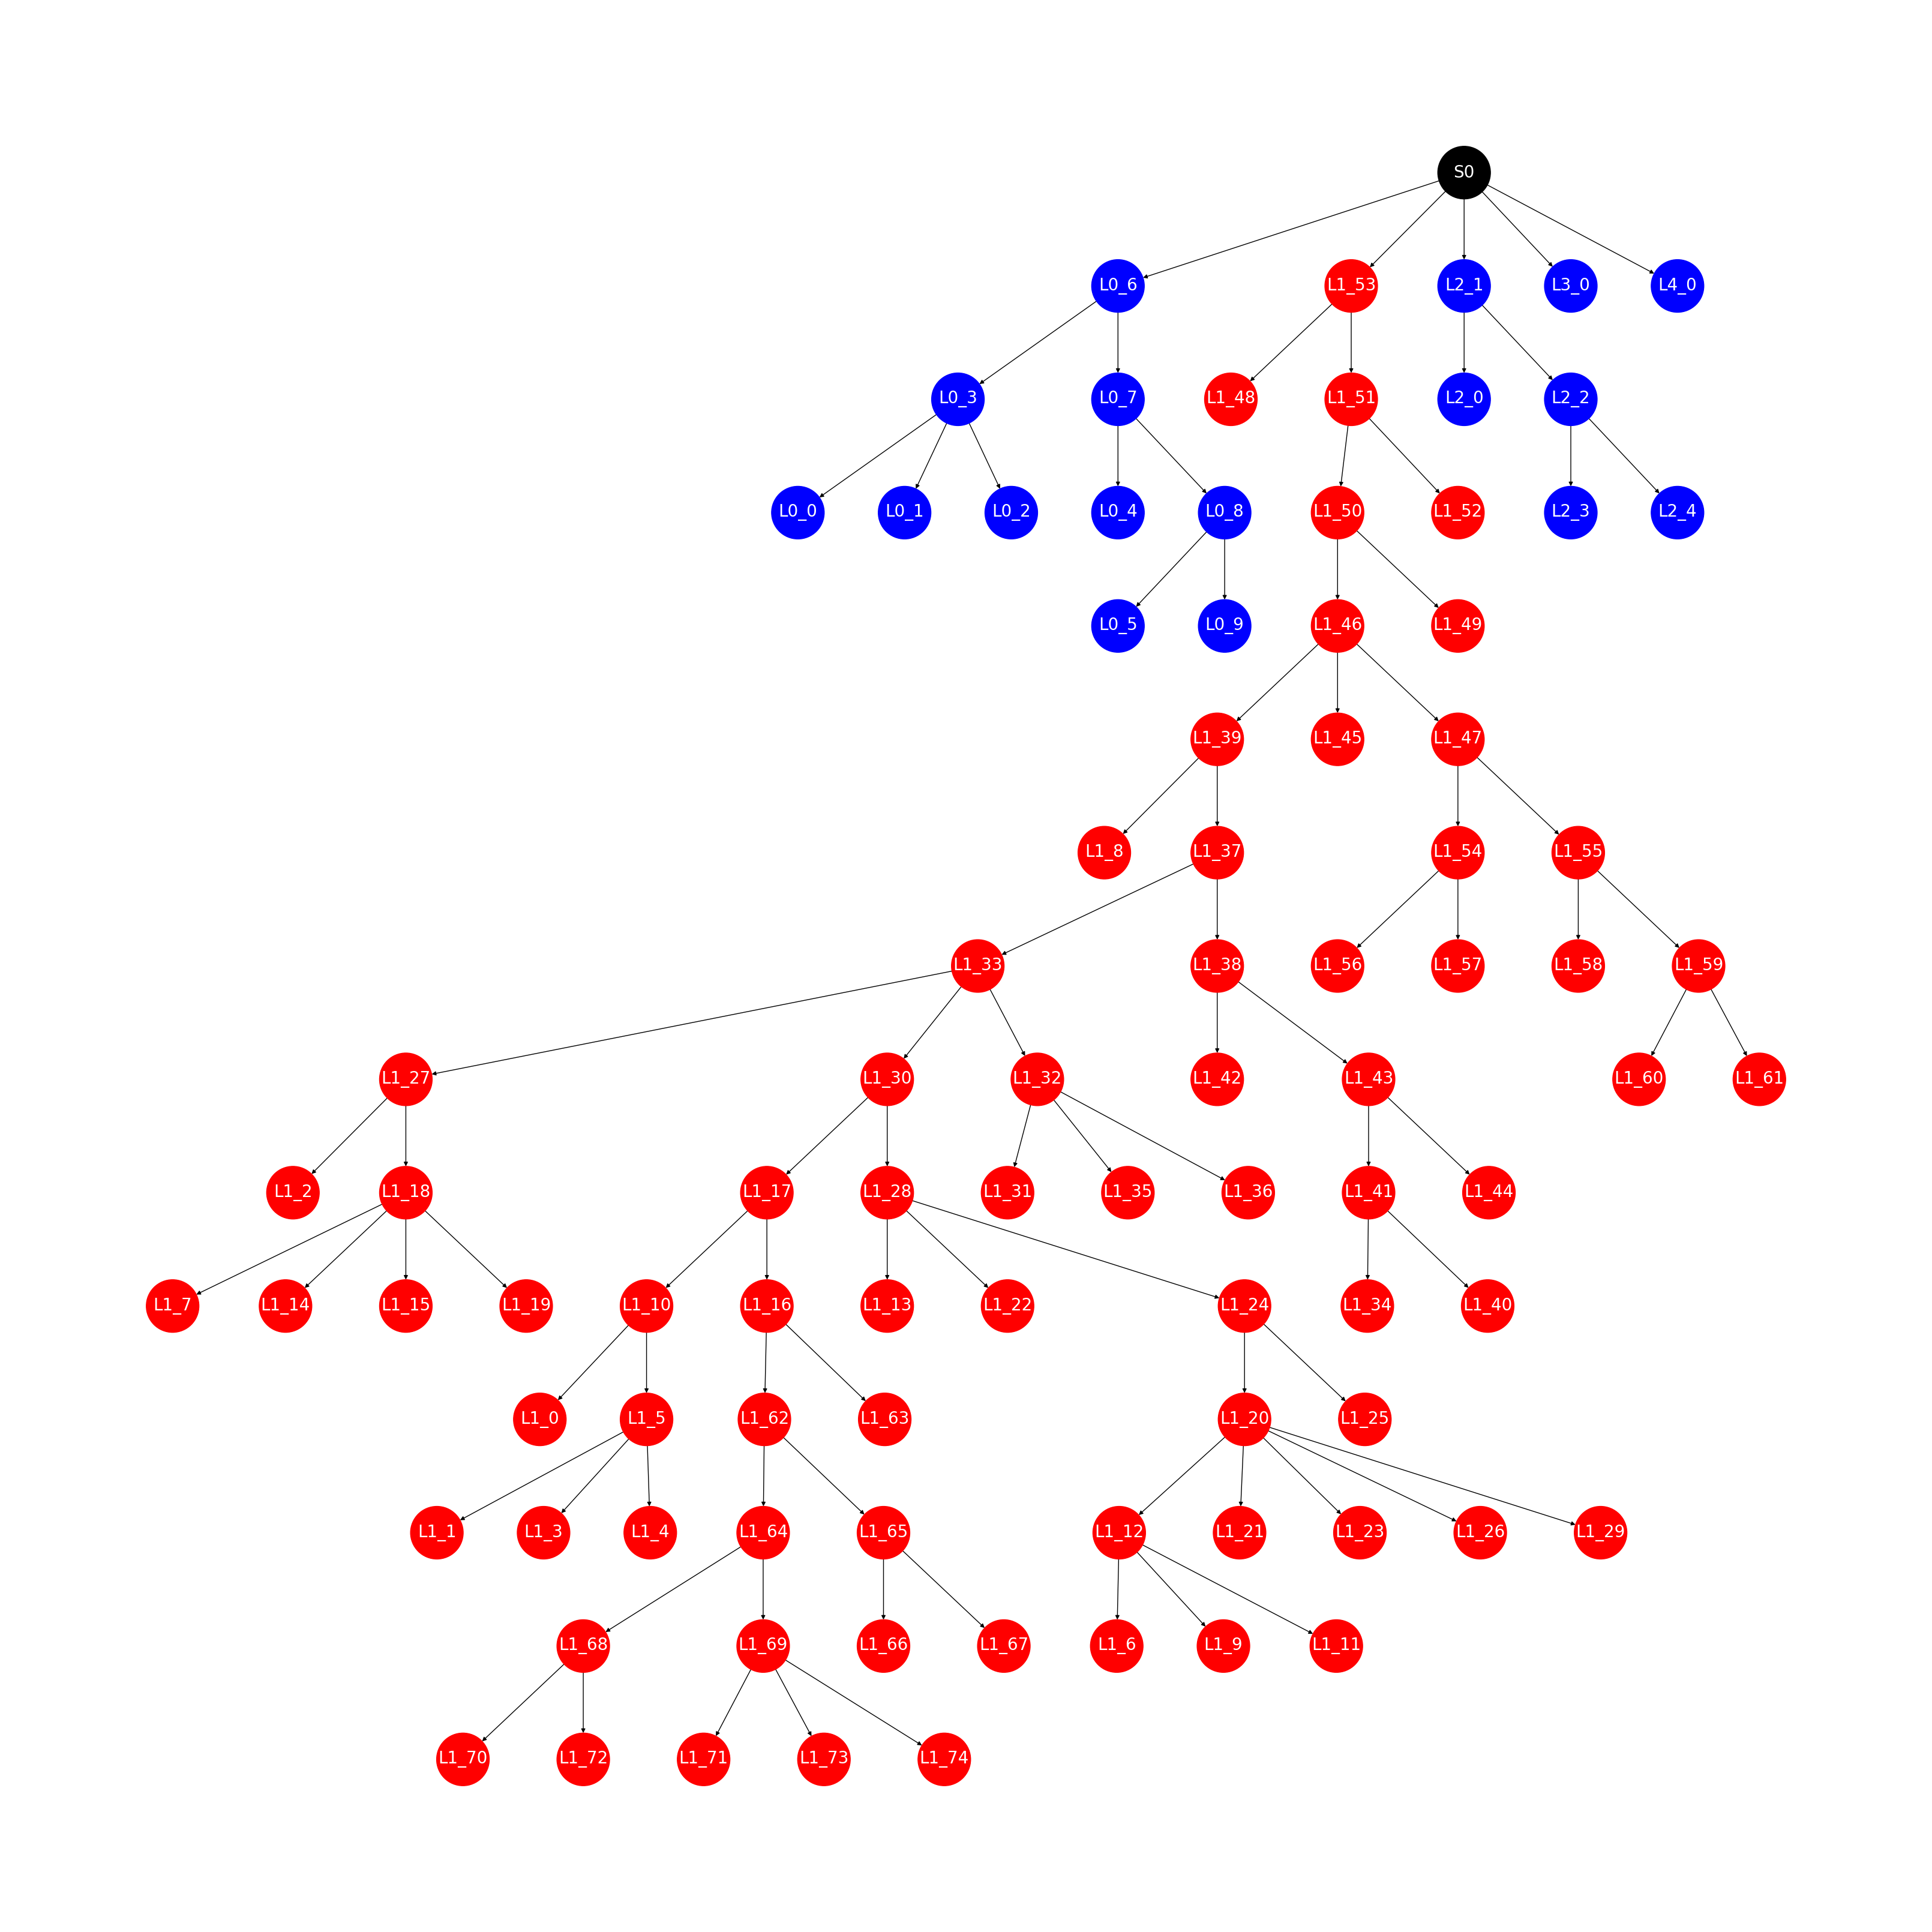

In [369]:
from neuron_morphology_tools import neuron_nx_utils as nxu
nxu.draw_tree(stage_products.neuron_graph_high_fid_axon)

### syn_density_[head/neck/shaft/no_head]

In [374]:
stage_products.syn_density_head


0.3698102137825556

In [375]:
stage_products.syn_density_neck

0.005411856787061789

# 6. Auto Proofreading

## a) Attributes

### error synapses

In [377]:
n_obj_proof.distance_errored_synapses

[]

In [378]:
n_obj_proof.mesh_errored_synapses

In [379]:
n_obj_proof.mesh_errored_synapses_pre

### [compartment]_limb_branch_dict

In [396]:
basal_limb_branch_dict = n_obj_proof.basal_limb_branch_dict
basal_limb_branch_dict

{'L0': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'L2': array([0, 1, 2, 3, 4]),
 'L3': array([0]),
 'L4': array([0])}

### [compartment]_[mesh/skeleton]

In [400]:
from neurd import neuron_utils as nru
basal_mesh = nru.mesh_over_limb_branch_dict(n_obj_proof,basal_limb_branch_dict)
basal_skeleton = nru.skeleton_over_limb_branch_dict(n_obj_proof,basal_limb_branch_dict)

ipvu.plot_objects(
    n_obj_proof["S0"].mesh,
    meshes = [basal_mesh],
    meshes_colors="red",
    skeletons = [basal_skeleton]
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### [comp]_skeletal_length

In [406]:
from mesh_tools import skeleton_utils as sk
sk.calculate_skeleton_distance(basal_skeleton)

568427.8180631511

## b) Pipeline Products

In [388]:
n_obj_proof.pipeline_products.stages

['decimation',
 'soma_identification',
 'decomposition',
 'multi_soma_split_suggestions',
 'multi_soma_split_execution',
 'cell_type_ax_dendr',
 'auto_proof']

In [389]:
stage_products = n_obj_proof.pipeline_products["auto_proof"]
print(stage_products)

    apical_bbox_volume:0
    apical_bbox_x_max:0
    apical_bbox_x_max_soma_relative:0
    apical_bbox_x_min:0
    apical_bbox_x_min_soma_relative:0
    apical_bbox_y_max:0
    apical_bbox_y_max_soma_relative:0
    apical_bbox_y_min:0
    apical_bbox_y_min_soma_relative:0
    apical_bbox_z_max:0
    apical_bbox_z_max_soma_relative:0
    apical_bbox_z_min:0
    apical_bbox_z_min_soma_relative:0
    apical_branch_length_mean:0
    apical_branch_length_median:0
    apical_n_limbs:0
    apical_n_long_branches:0
    apical_n_medium_branches:0
    apical_n_short_branches:0
    apical_soma_angle_max:None
    apical_soma_angle_min:None
    axon_area:100.90173802125518
    axon_bbox_volume:0.020887414933042067
    axon_bbox_x_max:1484351.0
    axon_bbox_x_max_soma_relative:-4529.7605831723195
    axon_bbox_x_min:1464809.3443508793
    axon_bbox_x_min_soma_relative:-24071.416232293006
    axon_bbox_y_max:645340.1
    axon_bbox_y_max_soma_relative:56040.00626207271
    axon_bbox_y_min:588094.9182

In [408]:
[k for k in list(stage_products.export().keys()) if "filt" in k]

['filtering_info', 'split_locations_before_filter']

### [compartment]\_bbox_[x/y/z]_[min/max] (_soma_relative)

In [407]:
stage_products.basal_bbox_x_max_soma_relative

75517.22158488538

### merge error filtering

In [411]:
list(stage_products.filtering_info.keys())

['axon_on_dendrite_merges_time',
 'axon_on_dendrite_merges_error_area',
 'axon_on_dendrite_merges_error_length',
 'axon_on_dendrite_merges_limb_branch_dict_to_cancel',
 'axon_on_dendrite_merges_created_edges',
 'axon_on_dendrite_merges_red_blue_suggestions',
 'axon_on_dendrite_merges_split_locations',
 'axon_on_dendrite_merges_split_locations_before_filter',
 'high_degree_branching_time',
 'high_degree_branching_error_area',
 'high_degree_branching_error_length',
 'high_degree_branching_limb_branch_dict_to_cancel',
 'high_degree_branching_created_edges',
 'high_degree_branching_red_blue_suggestions',
 'high_degree_branching_split_locations',
 'high_degree_branching_split_locations_before_filter',
 'low_degree_branching_time',
 'low_degree_branching_error_area',
 'low_degree_branching_error_length',
 'low_degree_branching_limb_branch_dict_to_cancel',
 'low_degree_branching_created_edges',
 'low_degree_branching_red_blue_suggestions',
 'low_degree_branching_split_locations',
 'low_degree